# F-scores

Sean $\mathcal{P}$ y $\mathcal{R}$ la precisión y cobertura obtenidas para un $\tau$ dado en una curva PR. Con el fin de facilitar la comparación de pares precisión-cobertura diferentes, en muchas tareas NLP como recuperación de información se usan criterios para medir la calidad de $\mathcal{P}$ y $\mathcal{R}$ combinadas. En particular, el criterio más popular es el **F-score,** $F_{\beta}$ con $\beta\geq 0$:
$$F_{\beta}=(1+\beta^2)\,\frac{\mathcal{P}\,\mathcal{R}}{\beta^2\mathcal{P}+\mathcal{R}}%
\qquad\text{o}\qquad%
\frac{1}{F_{\beta}}=\frac{1}{1+\beta^2}\,\frac{1}{\mathcal{P}}+\frac{\beta^2}{1+\beta^2}\,\frac{1}{\mathcal{R}}$$
La $\beta$ del F-score juega un papel muy importante ya que este criterio se derivó para medir la calidad de la recuperación con respecto a un usuario que da $\beta$ veces más importancia a la cobertura que a la precisión. El caso $\beta=1$ es muy popular; en este caso $F_1$ es la **media armónica** de $\mathcal{P}$ y $\mathcal{R}$:
$$F_1=2\,\frac{\mathcal{P}\,\mathcal{R}}{\mathcal{P}+\mathcal{R}}%
=\frac{2}{\frac{1}{\mathcal{R}}+\frac{1}{\mathcal{P}}}$$
Otros valores usuales de $\beta$ son $2$, que da el doble de importancia a la cobertura, y $0.5$, que da el doble de importancia a la precisión.
Nótese que $F_0=\mathcal{P}$. A continuación se muestra $F_{\beta}$ en función de $\mathcal{P}$ y $\mathcal{R}$, para $\beta\in\{0.5, 1, 2\}$.


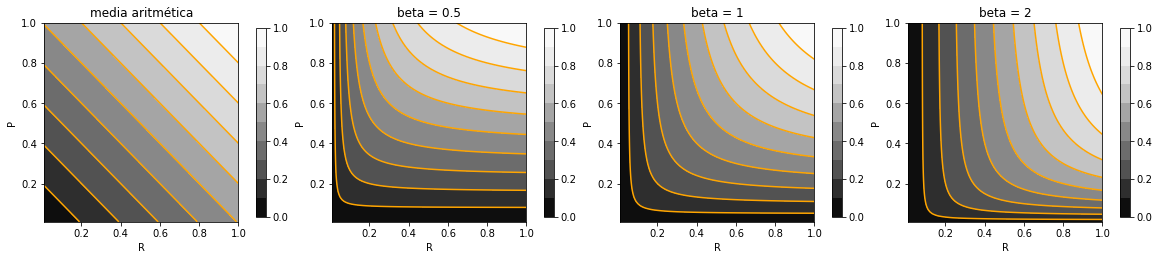

In [33]:
import numpy as np
import matplotlib.pyplot as plt
R, P = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))
RP = np.c_[np.ravel(R), np.ravel(P)]
B = (0.5, 1, 2); nrows = 1; ncols = 1 + len(B) # plot de media + len(B) plots de F
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 14*nrows/ncols), constrained_layout=True)
ax = axs.flat[0]; A = lambda rp: 0.5 * rp.sum(); AA = np.apply_along_axis(A, 1, RP)
ax.set_title(f"media aritmética"); ax.set_xlabel('R'); ax.set_ylabel('P')
ax.contour(R, P, AA.reshape(R.shape), 10, colors='orange', linestyles='solid')
cp = ax.contourf(R, P, AA.reshape(R.shape), 10, cmap='Greys_r')
plt.colorbar(cp, ax=ax, shrink=0.95)
for ax, b in zip(axs.flat[1:], B):
    bsquare = np.square(b)
    F = lambda rp: (1 + bsquare) * rp.prod() / ( bsquare * rp[1] + rp[0] )
    FF = np.apply_along_axis(F, 1, RP)
    ax.set_title(f"beta = {b}"); ax.set_xlabel('R'); ax.set_ylabel('P')
    ax.contour(R, P, FF.reshape(R.shape), 10, colors='orange', linestyles='solid')
    cp = ax.contourf(R, P, FF.reshape(R.shape), 10, cmap='Greys_r')
    plt.colorbar(cp, ax=ax, shrink=0.95)

Un criterio obvio es la media aritmética, $(\mathcal{P}+\mathcal{R})/2$, pero no se considera adecuado pues tiende a sobrevalorar la cobertura cuando, como suele ocurrir, la prevalencia (fracción de positivos) es muy baja.